In [23]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [24]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

In [25]:
X.shape , y.shape

((100, 2), (100,))

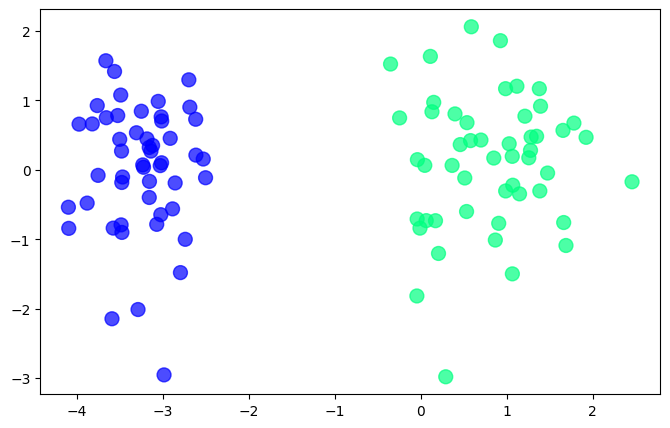

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100,alpha=0.7)

## Using Perceptron Trick :

In [27]:
def step(z):
    return 1 if z>0 else 0

In [28]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr * (y[j]-y_hat) * X[j]
        
    return weights[0],weights[1:]

In [29]:
intercept_ , coef_ = perceptron(X,y)

In [30]:
print("Coefficient :",coef_)   # A , B
print("Intercept :",intercept_)  # C

Coefficient : [0.98628302 0.45500818]
Intercept : 1.3000000000000003


In [31]:
m = -(coef_[0]/coef_[1])  # -A/B

b = -(intercept_/coef_[1])   # -C/B

In [32]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

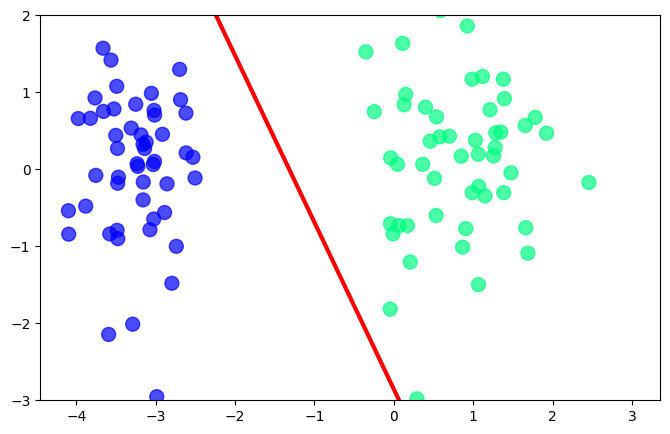

In [33]:
plt.figure(figsize=(8,5))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100,alpha=0.7)
plt.ylim(-3,2)

## Using Logistic Regression :

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [36]:
m = -(lr.coef_[0][0] / lr.coef_[0][1])

b = -(lr.intercept_ / lr.coef_[0][1])

In [37]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

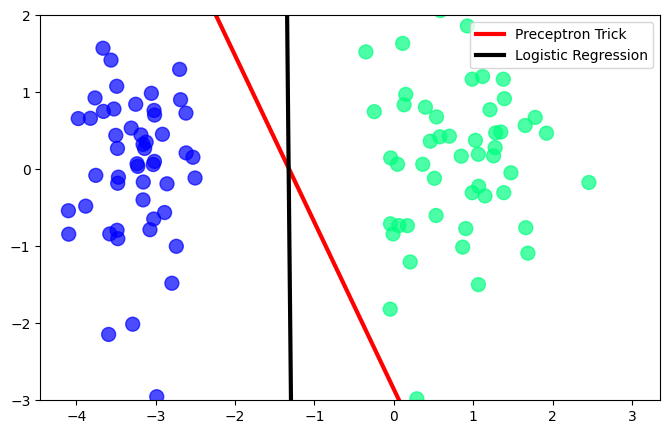

In [38]:
plt.figure(figsize=(8,5))
plt.plot(x_input,y_input,color='red',linewidth=3,label='Preceptron Trick')
plt.plot(x_input1,y_input1,color='black',linewidth=3,label='Logistic Regression')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100,alpha=0.7)
plt.legend()
plt.ylim(-3,2)

## NOTE :

`Logistic Regression` performs better than Perceptron Trick , as Perceptron Trick may have more test error.

## Using Sigmoid :

In [39]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [40]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [41]:
intercept_ , coef_ = perceptron(X,y)

In [42]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [43]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

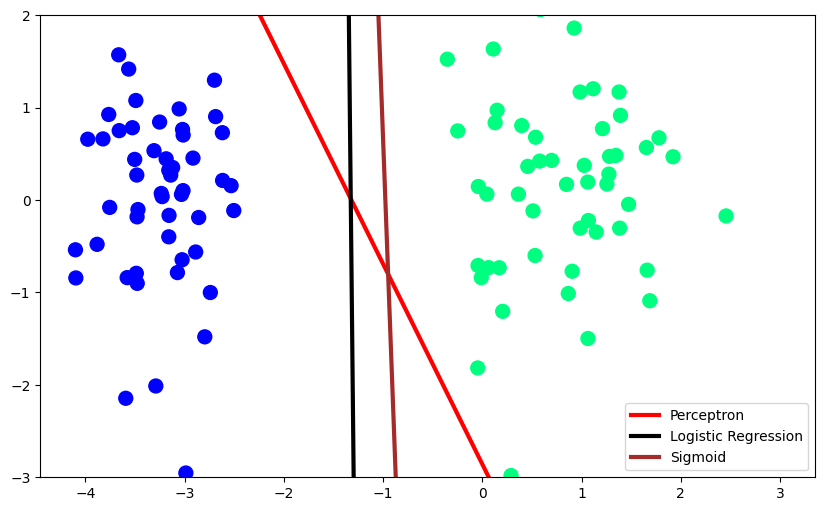

In [48]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3,label='Perceptron')
plt.plot(x_input1,y_input1,color='black',linewidth=3,label='Logistic Regression')
plt.plot(x_input2,y_input2,color='brown',linewidth=3,label='Sigmoid')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend(loc='lower right')
plt.show()